# Population, Agricultural Production, and the Green Revolution: East Asia

**What is this?** 

This file is a template document that each member of our team copied to perform their data analysis and visualisations. Given that our topic is the Green Revolution and its impact on population in Asia, we divided the work into regions. Emma was assigned South Asia (SA), Elan: East Asia (EA), Ploy: Mainland Southeast Asia (SEA), and Xinyu and Xi Wang Maritime Southeast Asia (MSEA). 

**Why did we make it?**

We all wanted to create similar visualisations and analyses for each region to answer the core question of what affect on agriculutre, and thus population, the Green Revolution had. However, given our lack of familiarity with Git, we didn't want to risk working on a single file and accidentally overwriting each other's work. We decided to work in our own, cloned files in the main branch to address these concerns, while also allowing for some creative liberty in the exact visualisations we are making. 

**Who made this?**

Elan Trager

In [4]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.1-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.1-py3-none-any.whl (295 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: pytz
    Found exist

Key '8592968160949085942' not in persistent cache.
Key '-9145709785729867372' not in persistent cache.
Key '-5880877683731309066' not in persistent cache.
Key '-5717546201864511796' not in persistent cache.
Key '2750039759324410568' not in persistent cache.
Key '-7182387863699440813' not in persistent cache.
Key '-7089553878954351262' not in persistent cache.
Key '-4278550491437065295' not in persistent cache.
Key '-8645301471471808972' not in persistent cache.
Key '-982111986488882538' not in persistent cache.
Key '-6284162540954351573' not in persistent cache.
Key '-9037631978290461855' not in persistent cache.
Key '-1374442493307535421' not in persistent cache.
Key '-5609468394425106279' not in persistent cache.
Key '-7395632927356215908' not in persistent cache.
Key '-2222123958794394829' not in persistent cache.
Key '-3876563412808331639' not in persistent cache.
Key '-7657760599444630158' not in persistent cache.
Key '9219796871778610772' not in persistent cache.
Key '28818337101

In [65]:
from aux_functions import population, acronymfinder

In [6]:
# Set World Bank Data Sources/Indicators for Population
 
SOURCE = 40 # "Population estimates and projections
pop_indicators = wbdata.get_indicators(source=SOURCE)

pop_indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

/home/jovyan/EEP_153_Project/aux_functions.py:146: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



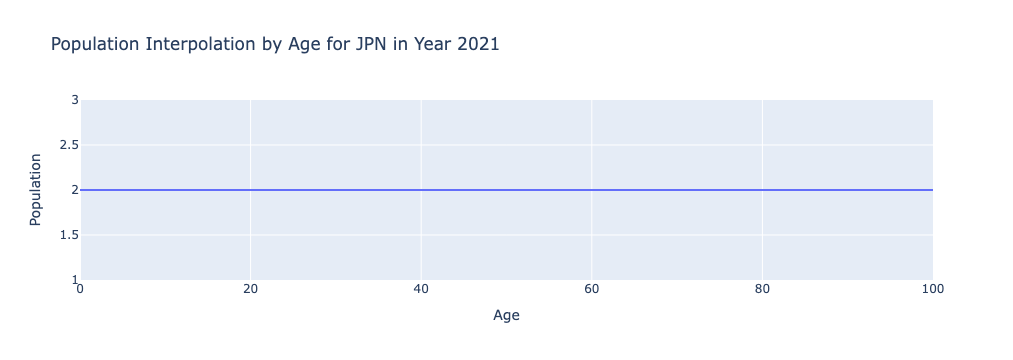

'No data for this year'

In [68]:
population(2021, 'FE', [7,23], 'JPN', graph = True)

## Population Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [8]:
wbdata.get_countries()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

## Graphs of Population Trends
*Below are the visualizations of the population data trends.*

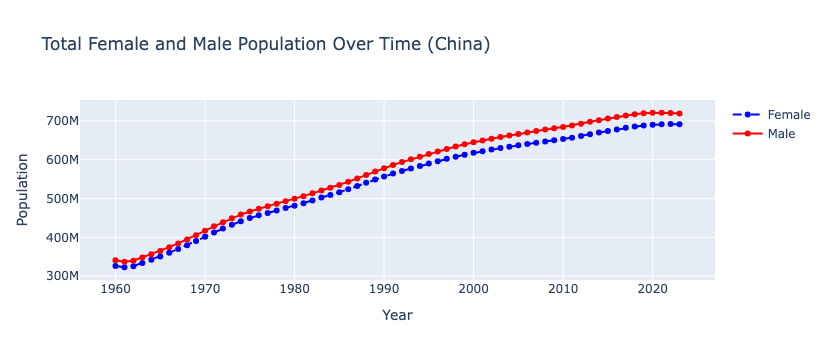

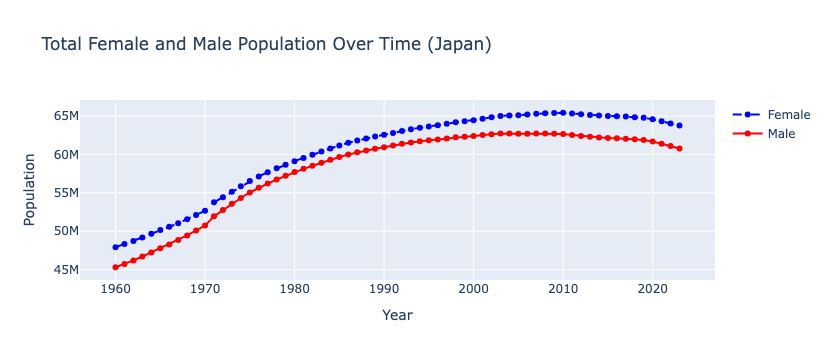

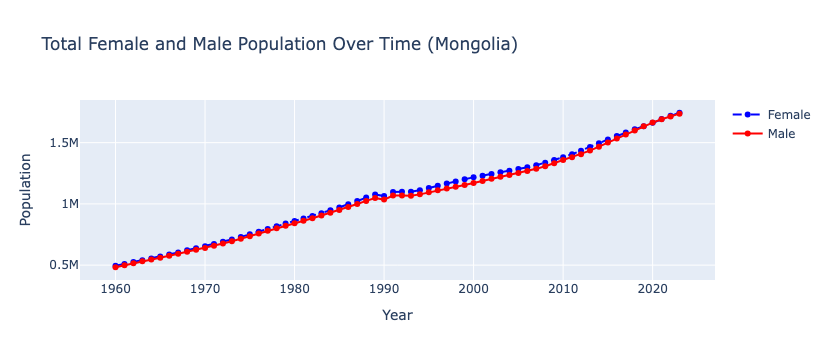

Country 'Korea, Rep' not found in the dataset.
Country 'Hong Kong' not found in the dataset.


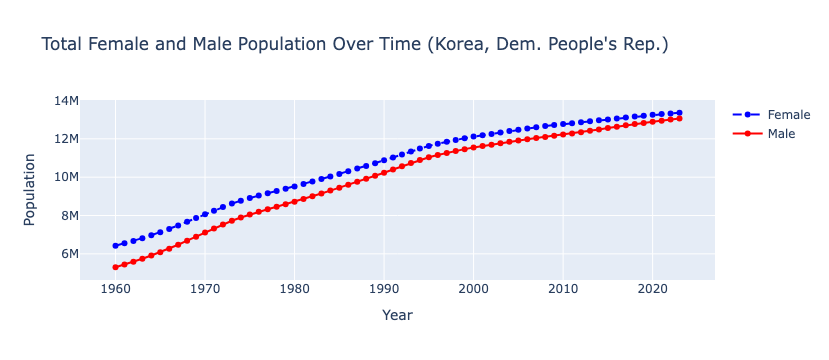

### Population Stat Data Table.*

In [41]:
output = construct_dataframe({"CHN":"China",
             "JPN":"Japan",
             "MNG": "Mongolia",
             "KOR": "Korea, Rep",
             "HKG": "Hong Kong",
             "PRK": "Korea, Dem. People's Rep."
            }, 'Population', graph_output = True)

In [42]:
output

Total Population                                    \
country               China Hong Kong SAR, China        Japan   
Year                                                            
1960-01-01     6.670700e+08            3114671.0   93216000.0   
1961-01-01     6.603300e+08            3168100.0   94055000.0   
1962-01-01     6.657700e+08            3305200.0   94933000.0   
1963-01-01     6.823350e+08            3420900.0   95900000.0   
1964-01-01     6.983550e+08            3504600.0   96903000.0   
...                     ...                  ...          ...   
2019-01-01     1.407745e+09            7507900.0  126633000.0   
2020-01-01     1.411100e+09            7481000.0  126261000.0   
2021-01-01     1.412360e+09            7413100.0  125681593.0   
2022-01-01     1.412175e+09            7346100.0  125124989.0   
2023-01-01     1.410710e+09            7536100.0  124516650.0   

                                                            Total Female  \
country    Korea, Dem. People's Rep. Korea, Rep.   Mongolia        China   
Year                                                                       
1960-01-01                11722953.0  25012374.0   977595.0  326058670.0   
1961-01-01                11990713.0  25765673.0  1009284.0  323019123.0   
1962-01-01                12262882.0  26513030.0  1041444.0  325892138.0   
1963-01-01                12567057.0  27261747.0  1071362.0  334167831.0   
1964-01-01                12889770.0  27984155.0  1100234.0  342156294.0   
...                              ...         ...        ...          ...   
2019-01-01                26037632.0  51764822.0  3267673.0  688332681.0   
2020-01-01                26136312.0  51836239.0  3327204.0  690313465.0   
2021-01-01                26232534.0  51769539.0  3383741.0  691353011.0   
2022-01-01                26328845.0  51672569.0  3433748.0  691718700.0   
2023-01-01                26418204.0  51712619.0  3481145.0  691540464.0   

                                                                       ...  \
country    Hong Kong SAR, China       Japan Korea, Dem. People's Rep.  ...   
Year                                                                   ...   
1960-01-01            1527049.0  47910400.0                 6420780.0  ...   
1961-01-01            1553930.0  48318272.0                 6547394.0  ...   
1962-01-01            1620301.0  48735254.0                 6676112.0  ...   
1963-01-01            1676377.0  49192294.0                 6820425.0  ...   
1964-01-01            1723212.0  49660943.0                 6973765.0  ...   
...                         ...         ...                       ...  ...   
2019-01-01            4109737.0  64757100.0                13206827.0  ...   
2020-01-01            4102464.0  64578063.0                13250754.0  ...   
2021-01-01            4068311.0  64301379.0                13289964.0  ...   
2022-01-01            4032283.0  64036315.0                13326404.0  ...   
2023-01-01            4138892.0  63745563.0                13360198.0  ...   

           Total Rural                                                   \
country          Japan Korea, Dem. People's Rep. Korea, Rep.   Mongolia   
Year                                                                      
1960-01-01  34236372.0                 7010912.0  18081445.0   628799.0   
1961-01-01  33659463.0                 7055096.0  18414469.0   628966.0   
1962-01-01  33089846.0                 7095794.0  18702026.0   627678.0   
1963-01-01  32544624.0                 7148645.0  18972268.0   631504.0   
1964-01-01  32005123.0                 7205124.0  19204966.0   642702.0   
...                ...                       ...         ...        ...   
2019-01-01  10513072.0                 9859410.0   9612727.0  1027912.0   
2020-01-01  10376129.0                 9832219.0   9634283.0  1042846.0   
2021-01-01  10221684.0                 9799950.0   9621887.0  1056235.0   
2022-01-01  10066305.0                 976

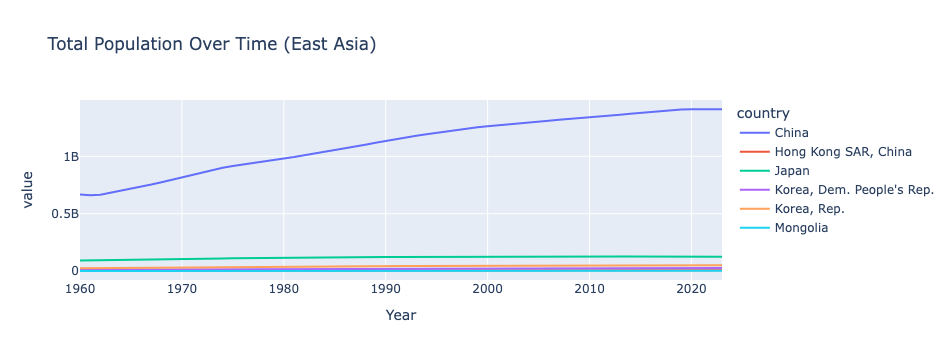

In [43]:
# Produce total population over time plot (include each country and the region)
SA_total = output["Total Population"]

SA_total.plot(title="Total Population Over Time (East Asia)")

## Mortality rates

## Graphs of Mortality and Life Expectancy Trends
*Below are the visualizations of the life related trends.*

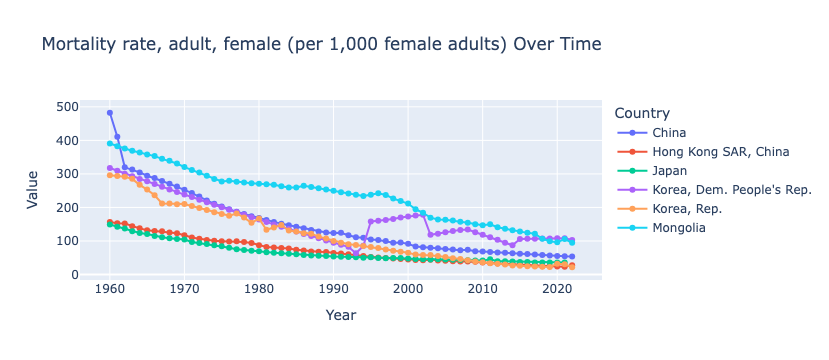

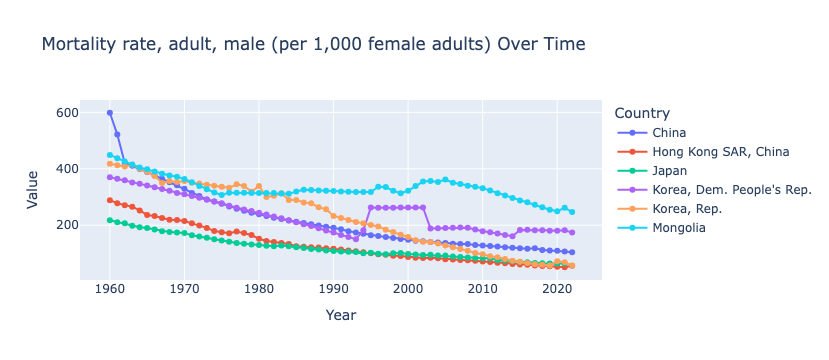

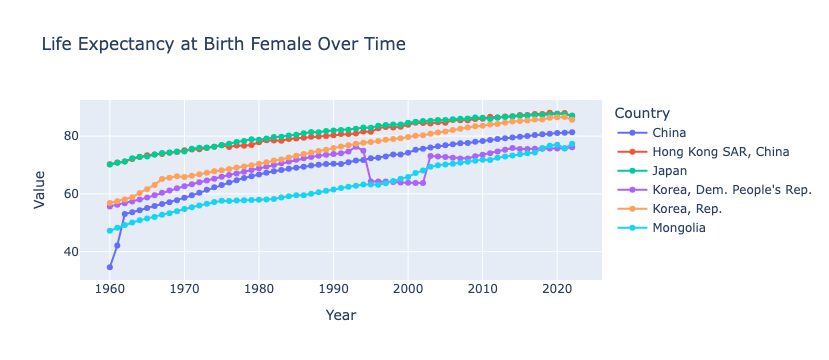

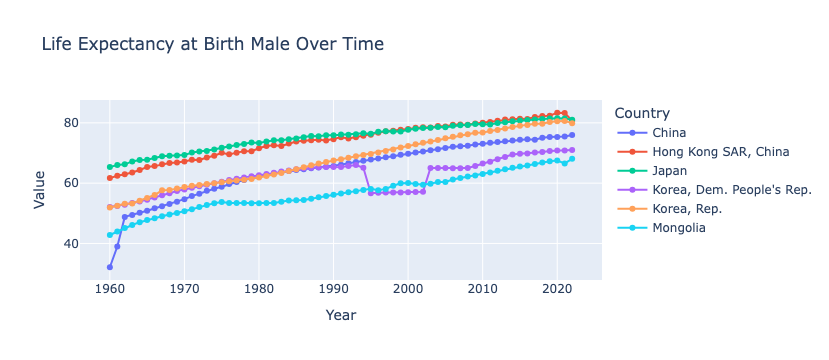

### Mortality and Life Expectancy Stat Data Table.

Mortality rate, adult, female (per 1,000 female adults)  \
country                                                      China   
Year                                                                 
1960-01-01                                            482.386        
1961-01-01                                            410.621        
1962-01-01                                            319.608        
1963-01-01                                            313.046        
1964-01-01                                            304.531        
...                                                       ...        
2019-01-01                                             56.969        
2020-01-01                                             55.437        
2021-01-01                                             54.207        
2022-01-01                                             53.888        
2023-01-01                                                NaN        

                                                                    \
country    Hong Kong SAR, China    Japan Korea, Dem. People's Rep.   
Year                                                                 
1960-01-01              156.718  149.040                   317.507   
1961-01-01              153.075  142.242                   309.436   
1962-01-01              151.898  137.378                   300.674   
1963-01-01              144.055  128.707                   292.849   
1964-01-01              137.607  123.801                   284.862   
...                         ...      ...                       ...   
2019-01-01               25.018   35.483                   107.521   
2020-01-01               24.116   35.611                   107.911   
2021-01-01               23.331   35.660                   108.318   
2022-01-01               27.912      NaN                   102.782   
2023-01-01                  NaN      NaN                       NaN   

                                 \
country    Korea, Rep. Mongolia   
Year                              
1960-01-01     296.045  390.682   
1961-01-01     293.789  382.730   
1962-01-01     291.565  375.801   
1963-01-01     285.233  369.264   
1964-01-01     267.450  363.775   
...                ...      ...   
2019-01-01      22.070   99.142   
2020-01-01      31.797   95.955   
2021-01-01      30.297  105.867   
2022-01-01      21.661   94.758   
2023-01-01         NaN      NaN   

           Mortality rate, adult, male (per 1,000 female adults)  \
country                                                    China   
Year                                                               
1960-01-01                                            598.591      
1961-01-01                                            521.116      
1962-01-01                                            420.312      
1963-01-01                                            410.834      
1964-01-01                                            399.342      
...                                                       ...      
2019-01-01                                            110.228      
2020-01-01                                            109.413      
2021-01-01                                            106.869      
2022-01-01                                            104.068      
2023-01-01                                                NaN      

                                                                    ...  \
country    Hong Kong SAR, China    Japan Korea, Dem. People's Rep.  ...   
Year                                                                ...   
1960-01-01              289.019  217.397                   370.324  ...   
1961-01-01              278.106  211.046                   365.030  ...   
1962-01-01              271.217  206.683                   359.015  ...   
1963-01-01              265.673  197.819                   351.835  ...   
1964-01-01              252.487  193.332                   346.645  ...   
...  

In [52]:
lifedf = construct_dataframe({"CHN":"China",
             "JPN":"Japan",
             "MNG": "Mongolia",
             "KOR": "Korea, Rep",
             "HKG": "Hong Kong",
             "PRK": "Korea, Dem. People's Rep."
            }, 'Life', graph_output = True)
lifedf

## Graphs of Mortality and Life Expectancy Trends
*Below are the visualizations of the life related trends.*

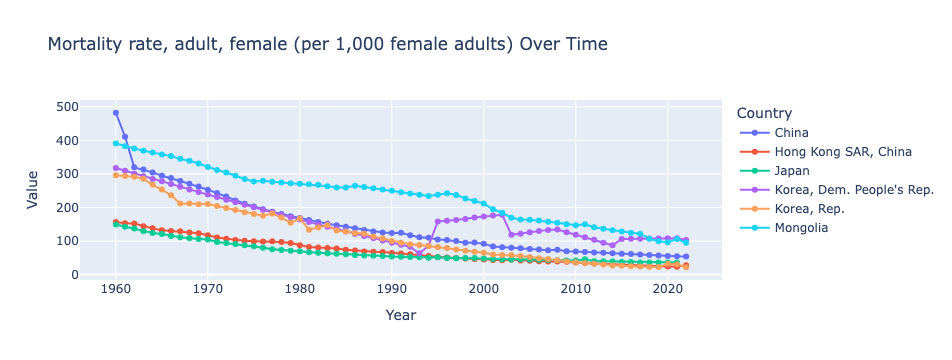

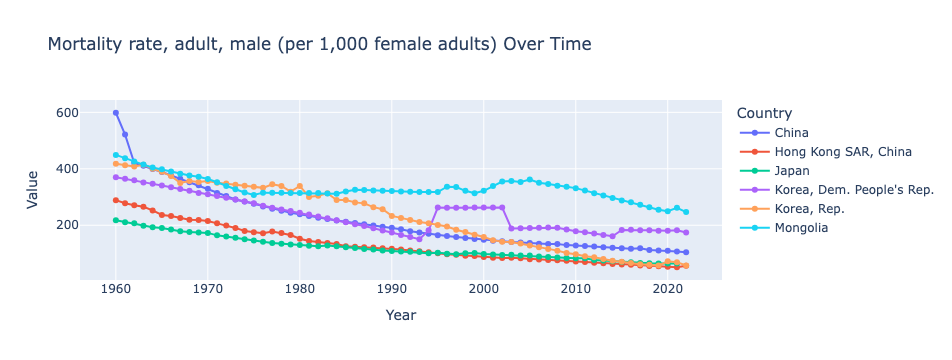

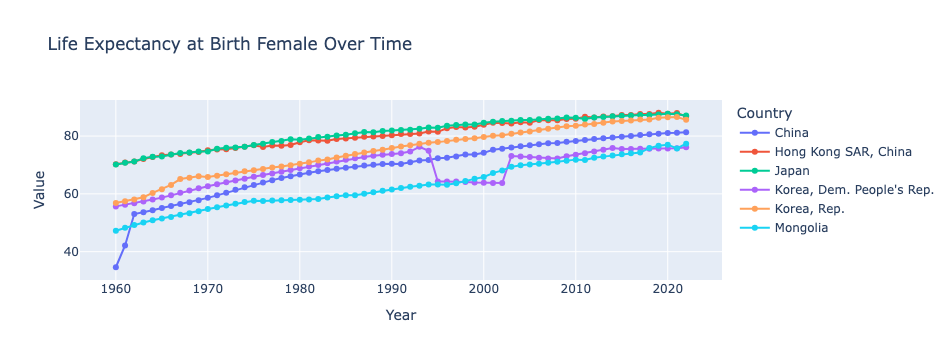

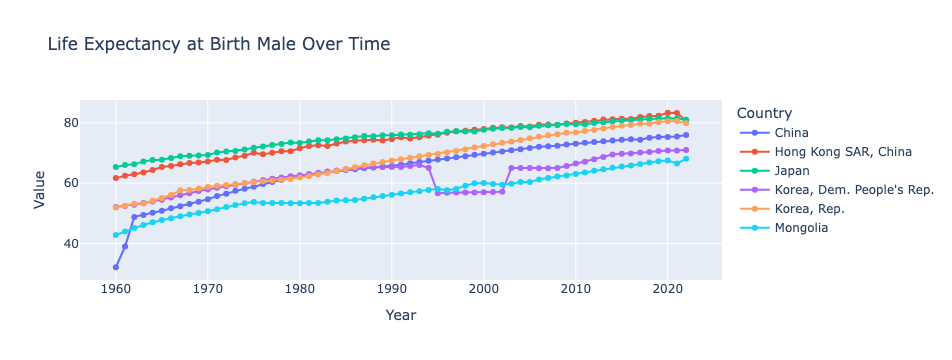

### Mortality and Life Expectancy Stat Data Table.

Mortality rate, adult, female (per 1,000 female adults)  \
country                                                      China   
Year                                                                 
1960-01-01                                            482.386        
1961-01-01                                            410.621        
1962-01-01                                            319.608        
1963-01-01                                            313.046        
1964-01-01                                            304.531        
...                                                       ...        
2019-01-01                                             56.969        
2020-01-01                                             55.437        
2021-01-01                                             54.207        
2022-01-01                                             53.888        
2023-01-01                                                NaN        

                                                                    \
country    Hong Kong SAR, China    Japan Korea, Dem. People's Rep.   
Year                                                                 
1960-01-01              156.718  149.040                   317.507   
1961-01-01              153.075  142.242                   309.436   
1962-01-01              151.898  137.378                   300.674   
1963-01-01              144.055  128.707                   292.849   
1964-01-01              137.607  123.801                   284.862   
...                         ...      ...                       ...   
2019-01-01               25.018   35.483                   107.521   
2020-01-01               24.116   35.611                   107.911   
2021-01-01               23.331   35.660                   108.318   
2022-01-01               27.912      NaN                   102.782   
2023-01-01                  NaN      NaN                       NaN   

                                 \
country    Korea, Rep. Mongolia   
Year                              
1960-01-01     296.045  390.682   
1961-01-01     293.789  382.730   
1962-01-01     291.565  375.801   
1963-01-01     285.233  369.264   
1964-01-01     267.450  363.775   
...                ...      ...   
2019-01-01      22.070   99.142   
2020-01-01      31.797   95.955   
2021-01-01      30.297  105.867   
2022-01-01      21.661   94.758   
2023-01-01         NaN      NaN   

           Mortality rate, adult, male (per 1,000 female adults)  \
country                                                    China   
Year                                                               
1960-01-01                                            598.591      
1961-01-01                                            521.116      
1962-01-01                                            420.312      
1963-01-01                                            410.834      
1964-01-01                                            399.342      
...                                                       ...      
2019-01-01                                            110.228      
2020-01-01                                            109.413      
2021-01-01                                            106.869      
2022-01-01                                            104.068      
2023-01-01                                                NaN      

                                                                    ...  \
country    Hong Kong SAR, China    Japan Korea, Dem. People's Rep.  ...   
Year                                                                ...   
1960-01-01              289.019  217.397                   370.324  ...   
1961-01-01              278.106  211.046                   365.030  ...   
1962-01-01              271.217  206.683                   359.015  ...   
1963-01-01              265.673  197.819                   351.835  ...   
1964-01-01              252.487  193.332                   346.645  ...   
...  

In [58]:
pop = construct_dataframe({"CHN":"China",
             "JPN":"Japan",
             "MNG": "Mongolia",
             "KOR": "Korea, Rep",
             "HKG": "Hong Kong",
             "PRK": "Korea, Dem. People's Rep."
            }, 'Life', graph_output = True)
pop

In [8]:
# Produce total cereal production over time plot for each country, specifying each type of cereal
# Produce same plot for the whole region

In [9]:
# Produce Crop Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

In [ ]:
# Produce Food Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

In [ ]:
# Produce plot of Agricultural Value Added per Worker for each country

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)

## Combined Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [10]:
# Overlay total population growth for each country over time with crop production index over time

In [ ]:
# Overlay total crop production index over time with agriculutral value of worker added

In [ ]:
# Add asymptotes for major technological advancements in the timeline (i.e. new fertiliser, etc.)

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)

# Auxiliary Functions Used

In [47]:
# Produce total female versus male populations over time for each country 
# Produce total female versus male populations over time for region as a whole
import plotly.graph_objects as go

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    female = df[('Total Female', country_name)]
    male = df[('Total Male', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Female and Male Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

/home/jovyan/EEP_153_Project/aux_functions.py:146: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



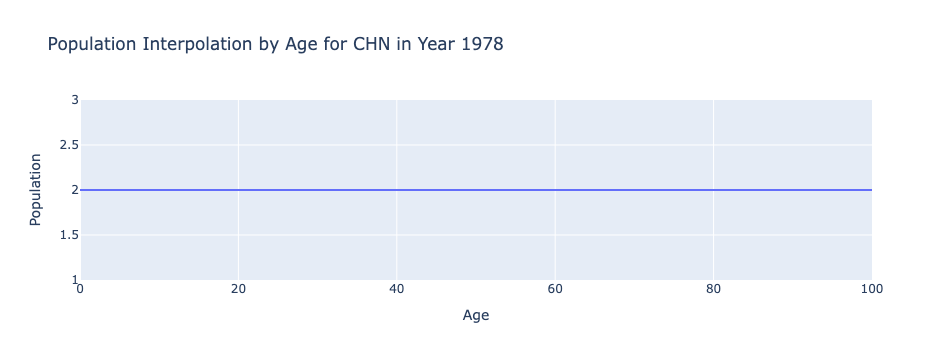

'No data for this year'

In [64]:
population(1978, 'FE', [7,35], 'CHN', graph = True)

In [2]:
from IPython.display import display, Markdown
def construct_dataframe(countries_dict, analysis_type, graph_output = False):
    countries = countries_dict
    if analysis_type == 'Population':
        display(Markdown("## Graphs of Population Trends\n*Below are the visualizations of the population data trends.*"))
        variable_labels = {"SP.POP.TOTL":"Total Population", 
                   "SP.POP.TOTL.FE.IN":"Total Female",
                  "SP.POP.TOTL.MA.IN":"Total Male",
                  "SP.RUR.TOTL":"Total Rural",
                  "SP.URB.TOTL":"Total Urban"
                  }
        SA_pop = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()
        SA_pop = SA_pop.unstack('country')
        SA_pop = SA_pop.reset_index()
        SA_pop = SA_pop.rename(columns={'date': 'Year'})
        SA_pop = SA_pop.set_index(['Year']).sort_index()
        if graph_output:
            for country in list(countries.values()):
                overlay_population(country, SA_pop)
        display(Markdown("### Population Stat Data Table.*"))
        return SA_pop
    if analysis_type == 'Life':
        display(Markdown("## Graphs of Mortality and Life Expectancy Trends\n*Below are the visualizations of the life related trends.*"))
        variable_labels = {"SP.DYN.AMRT.FE":"Mortality rate, adult, female (per 1,000 female adults)", 
                  "SP.DYN.AMRT.MA":"Mortality rate, adult, male (per 1,000 female adults)",
                   "SP.DYN.LE00.FE.IN":"Life Expectancy at Birth Female",
                  "SP.DYN.LE00.MA.IN":"Life Expectancy at Birth Male"
                  }
        lifedf = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()
        lifedf = lifedf.unstack('country')
        lifedf = lifedf.reset_index()
        lifedf = lifedf.rename(columns={'date': 'Year'})
        lifedf = lifedf.set_index(['Year']).sort_index()
        if graph_output:
            variable_labels = {col: col for col in lifedf.columns.get_level_values(0).unique()}
            generate_graphs(lifedf, variable_labels)
        display(Markdown("### Mortality and Life Expectancy Stat Data Table."))
        return lifedf
    if analysis_type == 'Food':
        display(Markdown("## Graphs of Different food trends Trends\n*Below are the visualizations of the food related trends.*"))
        variable_labels = {"AG.YLD.CREL.KG":"Cereal yield (kg per hectare)", 
                  "AG.LND.CREL.HA":"Land under cereal production (hectares)",
                   "AG.LND.CROP.ZS":"Permanent cropland (% of land area)"
                  }
        fooddf = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()
        fooddf = fooddf.unstack('country')
        fooddf = fooddf.reset_index()
        fooddf = fooddf.rename(columns={'date': 'Year'})
        fooddf = fooddf.set_index(['Year']).sort_index()
        if graph_output:
            variable_labels = {col: col for col in fooddf.columns.get_level_values(0).unique()}
            generate_graphs(fooddf, variable_labels)
        display(Markdown("### Mortality and Life Expectancy Stat Data Table."))
        return fooddf
    print('This is not currently an accepted analysis type. Please try either Life or Population')

In [49]:
def generate_graphs(lifedf, variable_labels):
    """
    Generate time-series graphs using Plotly, where each line represents a country,
    and each graph corresponds to a different statistic.

    Parameters:
        lifedf (DataFrame): DataFrame with life-related statistics.
        variable_labels (dict): Mapping of column names to descriptive labels.
    """
    for variable, label in variable_labels.items():
        fig = go.Figure()
        # quick check for existing variable
        if variable not in lifedf.columns:
            print(f"Skipping {variable}: Not found in DataFrame")
            continue
        for country in lifedf[variable].columns:
            data = lifedf[variable][country].dropna()  # Remove NaNs
            #adding country specific lines
            fig.add_trace(go.Scatter(
                x=data.index, 
                y=data.values, 
                mode='lines+markers', 
                name=country
            ))
        fig.update_layout(
            title=f"{label} Over Time",
            xaxis_title="Year",
            yaxis_title="Value",
            legend_title="Country"
        )

        # Show the figure
        fig.show()


In [1]:
import pandas as pd
import plotly.express as px

def plot_population_map_interactive(df, year):
    """
    Creates an interactive choropleth map of population for the given year
    using Plotly Express.

    Parameters
    ----------
    df : pd.DataFrame
        Wide-format DataFrame indexed by year. 
        Columns are country names recognized by Plotly (or after renaming).
    year : str
        The row label corresponding to the desired year.
    """

    # 1. Extract the row for the chosen year
    try:
        population_series = df.loc[year]
    except KeyError:
        print(f"No data for {year}")
        return

    # 2. Convert Series to DataFrame with ['country','population']
    pop_df = population_series.reset_index()
    pop_df.columns = ['country', 'population']

    # Example rename if needed:
    # pop_df.replace({'Hong Kong SAR, China': 'Hong Kong',
    #                 'Dem. People\'s Rep. Korea': 'North Korea',
    #                 'Rep. Korea': 'South Korea'}, inplace=True)
    
    # 3. Plotly Express Choropleth
    fig = px.choropleth(
        pop_df,
        locations='country',
        locationmode='country names',  # You can also use 'ISO-3' codes if you have them
        color='population',
        hover_name='country',
        color_continuous_scale='OrRd',
        title=f"Population Map - {year}"
    )
    
    fig.update_layout(legend_title_text='Population')
    fig.show()
